# 사이킷런 내장모델로 분류 진행 프로젝트

1. load_digits
2. load_wine
3. load_breast_cancer
___
사이킷런(scikit_learn) 데이터셋 종류
1) toy datasets \
2) real world datasets \
3) generated datasets \
4) loading other datasets 

이 중 toy datasets에 포함된 손글씨, 와인, 유방암 데이터를 통해 분류를 진행할 것이다.

# 1. load_digits : 손글씨를 분류해보자.

## 1-1. 데이터셋

In [1]:
# 라이브러리 호출
import sklearn
import pandas as pd
import numpy as np

In [2]:
# 필요한 모듈 import하기
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
# 데이터 준비
digits = load_digits()

dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

digits의 데이터에 담긴 속성들을 확인해 보았다.

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

dir함수로 출력한 값과 key함수로 출력한 값이 같게 나왔다.

*dir() 함수는 주어진 객체(object)의 속성(attribute) 목록을 반환한다. 객체에 정의된 모든 속성(메서드, 변수, 클래스 등)을 모두 반환하며, 객체에 상속된 속성도 모두 포함

*key() 함수는 주어진 딕셔너리의 모든 키(key)를 리스트로 반환한다. 

** dir() 함수와 key() 함수의 결과가 같게 나온 것은 해당 객체가 딕셔너리 타입이거나 해당 객체가 가진 속성 중 일부가 모두 키(key)로 정의되어 있다는 뜻이다.
이를 통해 digits의 데이터셋이 딕셔너리 형태로 저장되어 있다는 것을 알 수 있다.

In [5]:
# 데이터 크기 확인
digits_data = digits.data
print(digits_data.shape)

(1797, 64)


64개의 정보로 되어있는 데이터가 약 1797개가 담겨있다.

In [6]:
digits_data[:3]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

digits의 데이터를 확인해보기 위해 3개만 출력을 해 보았다. 64개의 정보들이 쭉 나열되어 있는 형태라는 것을 알 수 있다.

In [7]:
# target을 label로 설정하여 변수를 할당
digits_label = digits.target
print(digits_label.shape)
digits_label[:100]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [8]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

target을 label로 지정하고 안에 든 데이터를 확인해보니 약 1797개의 데이터가 들어있고 0부터 9의 숫자로 값이 나타나는 것을 확인 할 수 있다. 

In [9]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

데이터의 64개의 정보는 픽셀에 대한 정보였다는 것을 알 수 있다.

data 정보를 시각화 해보기로 한다.

### imshow()를 이용한 데이터 이미지화

- imshow는 array에 색을 채워 이미지로 표시해주는 기능을 한다.
- digits_data가 array로 배열이 되어있고 데이터가 픽셀의 값을 나타내고 있기 때문에 imshow를 이용하여 digits 데이터를 이미지로 나타낼 수 있다.

- imshow는 주어진 array에서 최대값을 1, 최소값을 0으로 대등해서 전체적인 값을 동일한 비율로 조절하여 0~1 사이의 숫자로 변환한 후 이미지로 나타내준다.
- imshow에서 colormap의 기본값은 'vivids'로 설정되어 있고, 원하는 색상으로 변경이 가능하다.
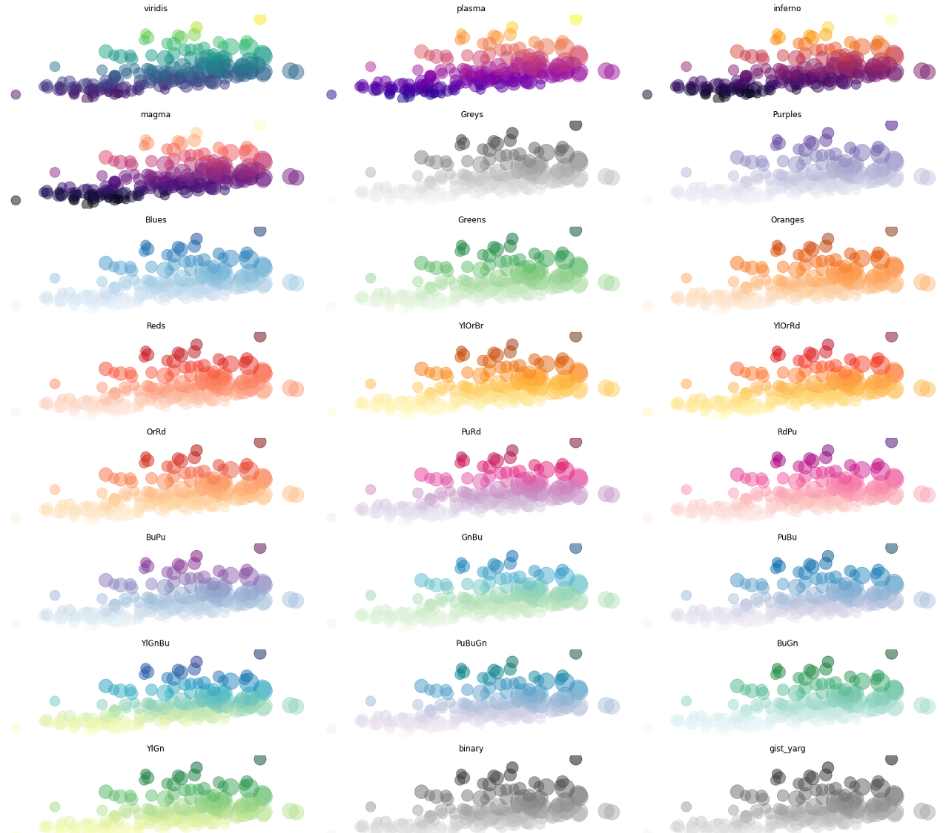

- 컬러맵으로 선택할 수 있는 색상의 일부를 가져와봤다.

출처) https://jrc-park.tistory.com/155

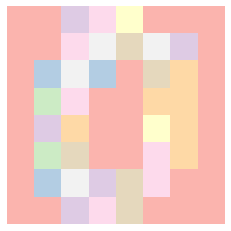

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='Pastel1')
plt.axis('off')
plt.show()

digits.data의 첫번째 데이터를 이미지화 해보았다. 0의 형태를 띠는 이미지로 시각화 된 것을 확인할 수 있다.
___

In [11]:
type(digits_data)

numpy.ndarray

In [12]:
digits_df = pd.DataFrame(data = digits_data, columns = digits.feature_names)
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [13]:
digits_df["label"] = digits.target
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


np.array로 되었던 정보를 데이터 프레임으로 바꾸어 주고 저장된 데이터가 어떤 숫자를 가르키는 지 나타내는 라벨 컬럼을 추가해주었다.

In [14]:
digits_df.head(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


데이터를 확인해보니 상단 10개의 데이터가 0부터 9의 데이터라는 것을 알 수 있다.
0~9의 데이터를 한 번에 이미지화 해보았다.

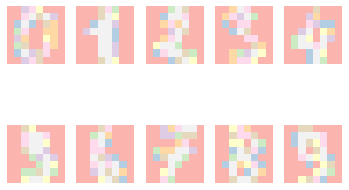

In [15]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='Pastel1') 
    plt.axis('off') 
plt.show()

0부터 9까지의 이미지를 눈으로 확인할 수 있다.
___
digits에 담긴 모든 정보들을 확인해보았다. 
손글씨를 분류할 수 있는 모델을 만드는 것이기 때문에 각 손글씨에 대한 픽셀값과 라벨이 설정되어 있다.
위 데이터를 토대로 검증데이터를 분리하여 머신러닝 모델을 만들어 볼 것이다.

## 1-2 검증데이터 분리

In [16]:
# train, test 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   test_size = 0.2,
                                                   random_state = 7)

random_state : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값
train_test_split()는 랜덤으로 데이터를 분리하므로 random_state를 설정하지 않으면 수행할 때마다 다른 학습/테스트 데이터 세트가 생성되므로 코드 실행 시 동일한 값을 얻기위해 random_state를 설정해준다.
어떤 숫자를 적든 그 기능은 같기 때문에 원하는 숫자를 임의로 설정 해 준다.

In [17]:
X_train.shape, y_train.shape

((1437, 64), (1437,))

In [18]:
X_test.shape, y_test.shape

((360, 64), (360,))

train과 test 데이터가 잘 분리된 것을 확인할 수 있다.

In [19]:
y_train, y_test

(array([2, 2, 2, ..., 1, 3, 3]),
 array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
        0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
        6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
        7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
        3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
        6, 9, 3, 8, 0, 8, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 8, 1, 2, 2,
        3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
        6, 0, 4, 4, 8, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
        8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
        8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
        8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
        8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
        3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
     

골고루 잘 섞여있음을 확인할 수 있다.

## 1-3. 머신러닝. 모델 학습 및 예측

1. 의사결정나무
2. 랜덤 포레스트
3. 서포트 벡터 머신(svm)
4. 확률적 경사하강법(SGDClassifier)
5. XGBoost

In [20]:
#다양한 분류모델로 학습시키기 위해 모듈을 불러온다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

#싸이킷런에 있는 분류 결과에 대한 시각화를 위한 모듈
from sklearn.metrics import classification_report 

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


### (1) 의사결정나무 (DecisionTree)




In [21]:
#1. Decision Tree 사용
decision_tree = DecisionTreeClassifier(random_state = 15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.81      0.90      0.85        42
           2       0.89      0.82      0.86        40
           3       0.82      0.91      0.86        34
           4       0.83      0.92      0.87        37
           5       0.93      0.96      0.95        28
           6       0.93      0.93      0.93        28
           7       0.87      0.82      0.84        33
           8       0.85      0.67      0.75        43
           9       0.79      0.81      0.80        32

    accuracy                           0.87       360
   macro avg       0.87      0.87      0.87       360
weighted avg       0.87      0.87      0.87       360



classification_report로 나오는 값에 대해서 학습하기 // 왜 10번으로 지정되어 나오는 건지???

의사결정나무 하이퍼파라미터

- criterion (기본값 gini) : 불순도 지표 (또는 엔트로피 불순도 entropy)
- max_depth (기본값 None) : 최대 한도 깊이
- min_samples_split (기본값 2) : 자식 노드를 갖기 위한 최소한의 데이터 수
- min_samples_leaf (기본값 1) : 리프 노드가 되기 위한 최소 샘플 수
- random_state : 난수의 수 지정

In [22]:
#1-1. 의사결정나무 하이퍼파라미터
## 먼저 criterion만 변경
decision_tree = DecisionTreeClassifier(criterion = 'entropy',
                                       max_depth = None,
                                       min_samples_split = 2,
                                       min_samples_leaf=1,
                                       random_state=15)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))                                       

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.83      0.81      0.82        42
           2       0.88      0.95      0.92        40
           3       0.91      0.91      0.91        34
           4       0.80      0.89      0.85        37
           5       0.77      0.82      0.79        28
           6       0.93      0.93      0.93        28
           7       0.91      0.88      0.89        33
           8       0.82      0.65      0.73        43
           9       0.72      0.72      0.72        32

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360



기본값(처음 하이퍼파라미터 전 결과)인 gini였을 때 보다 불순도 지표를 entropy로 바꾸자 수치가 더 감소한 것을 알 수 있다. 
criterion은 gini로 설정한다.

In [23]:
#1-1. 의사결정나무 하이퍼파라미터
## max_depth만 변경
decision_tree = DecisionTreeClassifier(criterion = 'gini',
                                       max_depth = 5,
                                       min_samples_split = 2,
                                       min_samples_leaf=1,
                                       random_state=15)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))    

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       1.00      0.17      0.29        42
           2       1.00      0.35      0.52        40
           3       0.67      0.85      0.75        34
           4       0.64      0.92      0.76        37
           5       1.00      0.89      0.94        28
           6       0.87      0.93      0.90        28
           7       0.88      0.64      0.74        33
           8       0.40      0.79      0.54        43
           9       0.62      0.75      0.68        32

    accuracy                           0.71       360
   macro avg       0.81      0.72      0.71       360
weighted avg       0.80      0.71      0.69       360



In [24]:
#1-1. 의사결정나무 하이퍼파라미터
## max_depth만 변경
decision_tree = DecisionTreeClassifier(criterion = 'gini',
                                       max_depth = 10,
                                       min_samples_split = 2,
                                       min_samples_leaf=1,
                                       random_state=15)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))                                       

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.82      0.86      0.84        42
           2       0.85      0.82      0.84        40
           3       0.84      0.91      0.87        34
           4       0.81      0.92      0.86        37
           5       0.93      0.96      0.95        28
           6       0.87      0.93      0.90        28
           7       0.87      0.79      0.83        33
           8       0.82      0.63      0.71        43
           9       0.79      0.84      0.82        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



In [25]:
#1-1. 의사결정나무 하이퍼파라미터
## max_depth만 변경
decision_tree = DecisionTreeClassifier(criterion = 'gini',
                                       max_depth = 11,
                                       min_samples_split = 2,
                                       min_samples_leaf=1,
                                       random_state=15)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))    

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.83      0.90      0.86        42
           2       0.89      0.80      0.84        40
           3       0.79      0.91      0.85        34
           4       0.83      0.92      0.87        37
           5       0.93      0.96      0.95        28
           6       0.93      0.93      0.93        28
           7       0.90      0.82      0.86        33
           8       0.85      0.65      0.74        43
           9       0.79      0.81      0.80        32

    accuracy                           0.86       360
   macro avg       0.87      0.87      0.87       360
weighted avg       0.87      0.86      0.86       360



In [26]:
#1-1. 의사결정나무 하이퍼파라미터
## max_depth만 변경
decision_tree = DecisionTreeClassifier(criterion = 'gini',
                                       max_depth = 12,
                                       min_samples_split = 2,
                                       min_samples_leaf=1,
                                       random_state=15)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))    

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.80      0.93      0.86        42
           2       0.89      0.80      0.84        40
           3       0.82      0.91      0.86        34
           4       0.83      0.92      0.87        37
           5       0.93      0.96      0.95        28
           6       0.93      0.93      0.93        28
           7       0.90      0.82      0.86        33
           8       0.85      0.67      0.75        43
           9       0.79      0.81      0.80        32

    accuracy                           0.87       360
   macro avg       0.87      0.87      0.87       360
weighted avg       0.87      0.87      0.87       360



max_depth는 5로 설정했을 때 굉장히 수치가 떨어진 결과가 나왔다. 조금씩 올려보니 12부터는 None일 때와 같은 결과가 나왔다.

In [27]:
#1-1. 의사결정나무 하이퍼파라미터
## min_samples_split만 변경
decision_tree = DecisionTreeClassifier(criterion = 'gini',
                                       max_depth = None,
                                       min_samples_split =4,
                                       min_samples_leaf=1,
                                       random_state=15)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))   

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.76      0.90      0.83        42
           2       0.87      0.82      0.85        40
           3       0.89      0.91      0.90        34
           4       0.81      0.92      0.86        37
           5       0.90      0.96      0.93        28
           6       1.00      0.93      0.96        28
           7       0.87      0.79      0.83        33
           8       0.84      0.60      0.70        43
           9       0.76      0.81      0.79        32

    accuracy                           0.86       360
   macro avg       0.87      0.87      0.86       360
weighted avg       0.86      0.86      0.86       360



min_samples_split은 숫자가 커질수록 좋아지는 것이 아니라 숫자를 올려서 시도해볼 때마다 수치값이 내려갔다, 올라갔다를 반복했다. 짝수 -> 홀수 일때 감소하고, 홀수 -> 짝수 일때 증가하는 양상을 보였다.  가장 높은 수치는 2일때였다.(기본값과 동일)

In [28]:
#1-1. 의사결정나무 하이퍼파라미터
## min_samples_leaf만 변경
decision_tree = DecisionTreeClassifier(criterion = 'gini',
                                       max_depth = None,
                                       min_samples_split = 2,
                                       min_samples_leaf=6,
                                       random_state=15)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))   

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.80      0.79      0.80        42
           2       0.85      0.82      0.84        40
           3       0.79      0.91      0.85        34
           4       0.77      0.92      0.84        37
           5       0.90      0.96      0.93        28
           6       1.00      0.93      0.96        28
           7       0.82      0.82      0.82        33
           8       0.84      0.63      0.72        43
           9       0.71      0.75      0.73        32

    accuracy                           0.84       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.84      0.84       360



값이 1일때가 가장 좋고, 2,3,4에 좋지 못하다가 잠깐 6일 때 수치가 올라간다.
또 7부터 다시 떨어진다

___
하이퍼파라미터 튜닝을 위한 방법으로는 GridSearchCV와 RandomizedSearchCV가 있다. 오늘 작업에서는 GridSearchCV를 사용하여 파라미터 값을 찾으려고 한다.

### GridSearchCV (그리드서치)

- 사용자가 관심있는 매개변수 전체를 대상으로 가능한 모든 조합을 시도해 보는 것
  from sklearn.model_selection import GridSearchCV를 입력하여 GridSearchCV를 불러온다.
  그런 다음 변수에 매개변수들과 값들을 넣어 할당해준다.
- GridSearchCV 개체에서 fit() 메소드를 시행하면 최적의 매개변수를 찾아줄 뿐만 아니라 교차 검증 성능이 가장 좋은 매개변수로 전체 훈련 데이터 세트에 대해 새로운 모델을 자동으로 만들어 준다.
- GridSearchCV의 파라미터
  
 1) CV : 교차검증 분할수
 
 2) return_train_score : train_score의 리턴 여부(True/False)
 
 3) estimator : 사용할 모델 객체 지정
 
 4) params_grid : 그리드 서치를 수행할 하이퍼파라미터 조합을 딕셔너리 형태로 지정
 
 5) scoring : 성능 지표 지정(기본값 : None)
 
 6) n_jobs : 그리드 서치를 수행할 때 사용할 CPU 코어 수 지정
 
 7) verbose : 그리드 서치의 진행상황을 출력할 지 여부 지정
 
 8) refit : 그리드서치에서 최적의 하이퍼파라미터를 찾은 후 해당 하이퍼파라미터를 사용하여 모델을 다시 학습할 지 여부 지정

In [29]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
# 그리드 서치를 위한 모듈을 불러왔다.

model = decision_tree
params_grid = {'criterion' : ['gini', 'entropy'], 
              'max_depth' : [4,8,12,16,20],
              'min_samples_split' : [2,3,4,5,6,7,8],
              'min_samples_leaf' : [1,2,3,4,5,6,7]}

grid_search = GridSearchCV(model, params_grid, cv=3 , n_jobs =-1, return_train_score=True)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 탐색
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [36]:
#1-1. 의사결정나무 하이퍼파라미터
## GridSearchCV 적용
decision_tree = DecisionTreeClassifier(criterion = 'gini',
                                       max_depth = 12,
                                       min_samples_split = 2,
                                       min_samples_leaf= 1,
                                       random_state=15)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.80      0.93      0.86        42
           2       0.89      0.80      0.84        40
           3       0.82      0.91      0.86        34
           4       0.83      0.92      0.87        37
           5       0.93      0.96      0.95        28
           6       0.93      0.93      0.93        28
           7       0.90      0.82      0.86        33
           8       0.85      0.67      0.75        43
           9       0.79      0.81      0.80        32

    accuracy                           0.87       360
   macro avg       0.87      0.87      0.87       360
weighted avg       0.87      0.87      0.87       360



최적의 파라미터를 찾아냈다. 기본값으로 설정된 파라미터가 대부분 최적의 값인 것 같다.
결과치가 동일하게 나왔다.
___
모델 평가를 위해 confusion_matrix 결과를 변수에 할당한 후 모델 평가에서 확인하도록한다.

In [37]:
from sklearn.metrics import confusion_matrix
CM_DT = confusion_matrix(y_test, y_pred)
CM_DT

array([[41,  0,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 0, 39,  0,  1,  0,  0,  0,  0,  0,  2],
       [ 0,  2, 32,  2,  0,  0,  0,  0,  3,  1],
       [ 0,  1,  0, 31,  0,  0,  0,  0,  1,  1],
       [ 1,  0,  0,  0, 34,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  2,  0, 26,  0,  0,  0],
       [ 0,  0,  0,  1,  2,  1,  0, 27,  0,  2],
       [ 0,  6,  4,  1,  1,  0,  1,  0, 29,  1],
       [ 0,  1,  0,  2,  1,  1,  0,  1,  0, 26]])

### (2) Random Forest (랜덤 포레스트)

In [32]:
#2. Random Forest 사용
rd_forest = RandomForestClassifier(random_state = 15)
rd_forest.fit(X_train, y_train)
y_pred = rd_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.91      1.00      0.95        42
           2       1.00      1.00      1.00        40
           3       0.97      1.00      0.99        34
           4       0.90      1.00      0.95        37
           5       0.90      0.96      0.93        28
           6       1.00      0.93      0.96        28
           7       0.94      0.97      0.96        33
           8       1.00      0.81      0.90        43
           9       0.97      0.94      0.95        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



랜덤포레스트의 하이퍼파라미터

- n_estimators (기본값 100) : 트리의 수
- criterion (기본값 gini) : 불순도 지표
- max_depth (기본값 None) : 최대 한도 깊이
- min_samples_split (기본값 2) : 자식 노드를 갖기 위한 최소한의 데이터 수
- min_samples_leaf (기본값 1) : 리프 노드가 되기 위한 최소 샘플 수
___

가독성을 위하여 작성하진 않았지만, 다른 모델들도 의사결정 나무와 같은 방법으로 파라미터들을 하나씩 변경해보며 매개변수들을 정해보았다.

In [33]:
#GridSearchCV
model = rd_forest
params_grid = {'n_estimators' : [100,200,300,400,500],
               'criterion' : ['gini','entropy'],
               'max_depth' : [10,20,30,40,50],
               'min_samples_split' : [2,4,6,8,10],
               'min_samples_leaf' : [1,3,5,7,9], 
               }

grid_search = GridSearchCV(model, params_grid, cv=3 , n_jobs =-1, return_train_score=True)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 탐색
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [38]:
#2-1. 랜덤포레스트 하이퍼파라미터
##GridSearchCV 적용
rd_forest = RandomForestClassifier(random_state = 15,
                                  n_estimators = 300,
                                  criterion = 'entropy',
                                  max_depth = 10,
                                  min_samples_split = 4,
                                  min_samples_leaf = 1
                                  )                                  
rd_forest.fit(X_train, y_train)
y_pred = rd_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       0.94      1.00      0.97        34
           4       0.92      0.97      0.95        37
           5       0.93      1.00      0.97        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.81      0.90        43
           9       0.97      0.94      0.95        32

    accuracy                           0.96       360
   macro avg       0.96      0.97      0.96       360
weighted avg       0.97      0.96      0.96       360



- 기본값으로 설정되었을 때보다 수치가 향상된 것을 확인할 수 있다.

In [40]:
CM_RF = confusion_matrix(y_test, y_pred)
CM_RF

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0, 27,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 32,  0,  0],
       [ 0,  3,  0,  2,  1,  0,  0,  2, 35,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 30]])

### (3) 서포트 벡터 머신(SVM)



In [41]:
#3. SVM 사용
svm_model = svm.SVC()
svm_model.fit(X_train, y_train) 
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



서포트 벡터 머신의 하이퍼파라미터
- C(기본값 : 1) : 오류를 얼마나 허용할 것인지(규제항), 클수록 하드마진, 작을수록 소프트마진에 가까움
- kernel : 'linear(선형)','poly(다항)','rbf(가우시안)','sigmoid(시그모이드)','precomputed'
- degree : 다항식 커널의 차수 결정
- gamma : 결정경계를 얼마나 유연하게 그릴지 결정, 클수록 오버피팅 발생 가능성 상승
- coef0 : 다항식 커널에 있는 상수항 r

In [42]:
CM_SVM = confusion_matrix(y_test, y_pred)
CM_SVM

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 31]])

### (4) 확률적 경사하강법(SGD)



In [43]:
#4. SGD Classifier 사용
sgd_model = SGDClassifier()

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.71      0.82        42
           2       1.00      0.97      0.99        40
           3       0.87      0.97      0.92        34
           4       1.00      1.00      1.00        37
           5       0.84      0.93      0.88        28
           6       1.00      0.93      0.96        28
           7       0.94      0.97      0.96        33
           8       0.78      0.93      0.85        43
           9       0.93      0.88      0.90        32

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360



SGD의 하이퍼파라미터

- alpha (또는 learning rate) : 모델이 학습하는 속도를 제어, 값이 높을수록 빠르게 학습하지만 불안정할 수 있고, 값이 낮으면 모델은 안정적이지만 시간이 오래걸릴 수 있음
- loss function : SGD Classifier는 분류 문제에 대해 다양한 loss function을 지원한다. 대표적인 예로는 hinge loss, logistic loss, modified Huber loss 등
- penalty : L1, L2, elastic net 등의 정규화 유형을 지정하는 데 사용, 정규화는 모델이 오버피팅 되지 않도록 함
- max_iter : 모델이 최대 몇 번의 반복 수행할 것이닞 결정
- early_stopping: True로 설정하면, 모델이 더 이상 성능이 향상되지 않을 때 자동으로 학습을 중단
- class_weight: 불균형한 클래스 분포를 고려할 때 사용
- shuffle : 각 반복에서 무작우로 섞일지 결정(True)

In [44]:
CM_SGD = confusion_matrix(y_test, y_pred)
CM_SGD

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  2,  0,  2,  0,  0,  7,  1],
       [ 0,  0, 39,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 26,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  0, 26,  0,  2,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 32,  0,  0],
       [ 0,  1,  0,  1,  0,  1,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  1,  1, 28]])

### (5) Logistic Regression



In [45]:
#5. Logistic Regression 사용

logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
CM_LR = confusion_matrix(y_test, y_pred)
CM_LR

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 27,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 32,  0,  0],
       [ 0,  2,  1,  0,  1,  4,  0,  0, 35,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 29]])

### (6) XGBoost

In [47]:
#6. xgboost 사용
xgb_model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



xgboost 하이퍼파라미터

- booster (기본값 gbtree) : 부스팅 알고리즘 (또는 dart, gblinear)
- objective (기본값 binary:logistic) : 이진분류 (다중분류: multi:softmax)
- max_depth (기본값 6) : 최대 한도 깊이
- learning_rate (기본값 0.1) : 학습률
- n_estimators (기본값 100) : 트리의 수
- subsample (기본값 1) : 훈련 샘플 개수의 비율
- colsample_bytree (기본값 1) : 특성 개수의 비율
- n_jobs (기본값 1) : 사용 코어 수 (-1: 모든 코어를 다 사용)

In [48]:
CM_XGB = confusion_matrix(y_test, y_pred)
CM_XGB

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 27,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 32,  0,  0],
       [ 0,  2,  1,  0,  1,  4,  0,  0, 35,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 29]])

## 1-4 모델 평가

confusion_matrix를 이용하여 모델 평가하기

### confusion_matrix (오차행렬)

- Confusion Matrix란 Training을 통한 Prediction 성능을 축정하기 위해 예측 Value와 실제 Value를 비교하는 표이다.

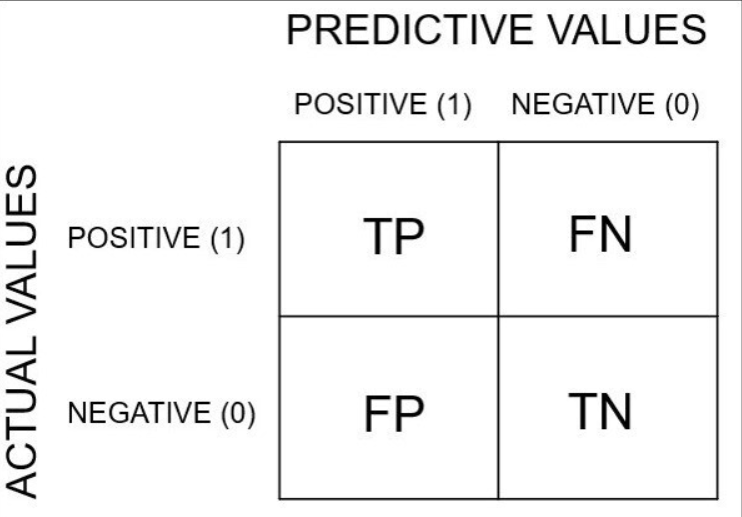

위 이미지가 confusion matrix이다. 이 표를 통해 각 지표를 알아볼 수 있다.

1. 정확도(Accuracy) : 전체 데이터 중 참을 맞춘 확률
    TP + TN / TP + TN + FP + FN

2. 정밀도(Precision) : 참이라고 예측한 값 중에 진짜 참인 확률
    TP / TP + FP

3. 재현율(Recall) : 실제 참 중에 참이라고 예측한 확률
    TP / TP + FN

4. F1 Score : 정밀도와 재현율을 결합한 지표
    2 (Precision X Recall / Precision + Recall)

5. roc_auc_score :ROC 곡선과 이에 기반한 AUC 스코어로 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표

In [49]:
# 모델 평가
print('DesicionTree\n', CM_DT)
print('RandomForest\n', CM_RF)
print('SVM\n', CM_SVM)
print('SGD\n', CM_SGD)
print('LogisticRegression\n', CM_LR)
print('XGBoost\n', CM_XGB)

DesicionTree
 [[41  0  0  0  1  0  1  0  0  0]
 [ 0 39  0  1  0  0  0  0  0  2]
 [ 0  2 32  2  0  0  0  0  3  1]
 [ 0  1  0 31  0  0  0  0  1  1]
 [ 1  0  0  0 34  0  0  1  1  0]
 [ 0  0  0  0  0 27  0  1  0  0]
 [ 0  0  0  0  2  0 26  0  0  0]
 [ 0  0  0  1  2  1  0 27  0  2]
 [ 0  6  4  1  1  0  1  0 29  1]
 [ 0  1  0  2  1  1  0  1  0 26]]
RandomForest
 [[43  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  1]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  1  0 27  0  0  0]
 [ 0  0  0  0  1  0  0 32  0  0]
 [ 0  3  0  2  1  0  0  2 35  0]
 [ 0  0  0  0  0  2  0  0  0 30]]
SVM
 [[43  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0]
 [ 0  2  0  0  0  1  0  0 40  0]
 [ 0  0 

손글씨 분류 모델에서는 데이터의 정확도가 중요하기 때문에
acurracy = TP+TN / TP+FN+FP+TN의 값을 살펴보도록 한다.
- DesicionTree : 312
- RandomForest : 347
- SVM : 356
- SGD : 337
- LogisticRegression : 343
- XGBoost : 343
___
분모의 값은 모두 360으로 같기 때문에 분자만 확인을 해 주었다.\
Digits 데이터에서 가장 뛰어난 모델은 SVM이다.

# 2. load_wine : 와인 분류

## 2-1 데이터셋

In [50]:
#필요한 모듈 import하기
from sklearn.datasets import load_wine

In [51]:
#데이터 준비하기
wine = load_wine()

print(dir(wine))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [52]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [53]:
wine_data = wine.data
print(wine_data.shape)

(178, 13)


In [54]:
wine_label = wine.target

print(wine_label.shape)
wine_label

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [55]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [56]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [57]:
type(wine.data)

numpy.ndarray

In [58]:
wine_df = pd.DataFrame(data = wine_data, columns = wine.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [59]:
wine_df["label"] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## 2-2 검증데이터 분리

In [60]:
# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(wine_data,
                                                   wine_label,
                                                   test_size = 0.2,
                                                   random_state = 15)

In [61]:
X_train.shape, y_train.shape

((142, 13), (142,))

In [62]:
X_test.shape, y_test.shape

((36, 13), (36,))

In [63]:
y_train, y_test

(array([0, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1,
        1, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 1, 2,
        1, 2, 2, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1,
        0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0,
        0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 0, 1, 2, 1, 0, 0,
        0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0,
        2, 0, 1, 1, 2, 2, 1, 1, 2, 2]),
 array([2, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 0,
        2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 0]))

## 2-3. 머신러닝. 모델 학습 및 예측

1. 의사결정나무
2. 랜덤 포레스트
3. 서포트 벡터 머신(svm)
4. 확률적 경사하강법(SGDClassifier)
5. XGBoost

In [64]:
#1. Decision Tree 사용
decision_tree = DecisionTreeClassifier(random_state = 15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.91      0.83      0.87        12
           2       0.92      0.92      0.92        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



In [65]:
CM_DT = confusion_matrix(y_test, y_pred)
CM_DT

array([[12,  0,  0],
       [ 1, 10,  1],
       [ 0,  1, 11]])

___

In [66]:
#2. Random Forest 사용
rd_forest = RandomForestClassifier(random_state = 15)
rd_forest.fit(X_train, y_train)
y_pred = rd_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [67]:
CM_RF = confusion_matrix(y_test, y_pred)
CM_RF

array([[12,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 12]])

___

In [68]:
#3. SVM 사용
svm_model = svm.SVC()
svm_model.fit(X_train, y_train) 
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.50      0.92      0.65        12
           2       0.00      0.00      0.00        12

    accuracy                           0.61        36
   macro avg       0.43      0.61      0.50        36
weighted avg       0.43      0.61      0.50        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
CM_SVM = confusion_matrix(y_test, y_pred)
CM_SVM

array([[11,  1,  0],
       [ 1, 11,  0],
       [ 2, 10,  0]])

___

In [70]:
#4. SGD Classifier 사용
sgd_model = SGDClassifier()

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.53      0.83      0.65        12
           2       0.00      0.00      0.00        12

    accuracy                           0.58        36
   macro avg       0.39      0.58      0.47        36
weighted avg       0.39      0.58      0.47        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
CM_SGD = confusion_matrix(y_test, y_pred)
CM_SGD

array([[11,  1,  0],
       [ 2, 10,  0],
       [ 4,  8,  0]])

___

In [72]:
#5. Logistic Regression 사용
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.86      1.00      0.92        12
           2       1.00      0.92      0.96        12

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.95        36



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
CM_LR = confusion_matrix(y_test, y_pred)
CM_LR

array([[11,  1,  0],
       [ 0, 12,  0],
       [ 0,  1, 11]])

___

In [74]:
#6. xgboost 사용
xgb_model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.86      1.00      0.92        12
           2       1.00      0.92      0.96        12

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.95        36



In [75]:
CM_XGB = confusion_matrix(y_test, y_pred)
CM_XGB

array([[11,  1,  0],
       [ 0, 12,  0],
       [ 0,  1, 11]])

## 2-4 모델 평가
___
confusion_matrix를 통해 모델을 평가한다.
와인 분류에 모델도 정확도가 중요하기 때문에 정확도를 기준으로 평가를 해 보았다.

In [76]:
# 모델 평가
print('DesicionTree\n', CM_DT)
print('RandomForest\n', CM_RF)
print('SVM\n', CM_SVM)
print('SGD\n', CM_SGD)
print('LogisticRegression\n', CM_LR)
print('XGBoost\n', CM_XGB)

DesicionTree
 [[12  0  0]
 [ 1 10  1]
 [ 0  1 11]]
RandomForest
 [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]
SVM
 [[11  1  0]
 [ 1 11  0]
 [ 2 10  0]]
SGD
 [[11  1  0]
 [ 2 10  0]
 [ 4  8  0]]
LogisticRegression
 [[11  1  0]
 [ 0 12  0]
 [ 0  1 11]]
XGBoost
 [[11  1  0]
 [ 0 12  0]
 [ 0  1 11]]


DesicionTree : 33
RandomForest : 36
SVM : 22
SGD : 19
LogisticRegression : 34
XGBoost : 34
___
와인 분류 모델에서는 RandomForest가 가장 적합한 모델임을 알 수 있다.

# 3. load_breast_cancer : 유방암 여부 진단

## 3-1. 데이터셋

In [77]:
# 필요한 모듈 import 하기
from sklearn.datasets import load_breast_cancer

In [78]:
# 데이터 준비하기
breast_cancer = load_breast_cancer()

print(dir(breast_cancer))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [79]:
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [80]:
breast_cancer_data = breast_cancer.data
print(breast_cancer_data.shape)

(569, 30)


In [81]:
breast_cancer_label = breast_cancer.target

print(breast_cancer_label.shape)
breast_cancer_label

(569,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [82]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [83]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [84]:
type(breast_cancer.data)

numpy.ndarray

In [85]:
breast_cancer_df = pd.DataFrame(data = breast_cancer_data, columns = breast_cancer.feature_names)
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [86]:
breast_cancer_df["label"] = breast_cancer.target
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## 3-2. 검증데이터 분리

In [87]:
# train, test 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data,
                                                   breast_cancer_label,
                                                   test_size = 0.2,
                                                   random_state = 7)

In [88]:
X_train.shape, y_train.shape

((455, 30), (455,))

In [89]:
X_test.shape, y_test.shape

((114, 30), (114,))

In [90]:
y_train, y_test

(array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 

## 3-3. 머신러닝. 모델 학습 및 예측

1. 의사결정나무
2. 랜덤 포레스트
3. 서포트 벡터 머신(svm)
4. 확률적 경사하강법(SGDClassifier)
5. XGBoost

In [91]:
#1. Decision Tree 사용
decision_tree = DecisionTreeClassifier(random_state = 15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.96      0.96      0.96        74

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [92]:
CM_DT = confusion_matrix(y_test, y_pred)
CM_DT

array([[37,  3],
       [ 3, 71]])

___

In [93]:
#2. Random Forest 사용
rd_forest = RandomForestClassifier(random_state = 15)
rd_forest.fit(X_train, y_train)
y_pred = rd_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        40
           1       0.95      1.00      0.97        74

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [94]:
CM_RF = confusion_matrix(y_test, y_pred)
CM_RF

array([[36,  4],
       [ 0, 74]])

___

In [95]:
#3. SVM 사용
svm_model = svm.SVC()
svm_model.fit(X_train, y_train) 
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



In [96]:
CM_SVM = confusion_matrix(y_test, y_pred)
CM_SVM

array([[29, 11],
       [ 0, 74]])

___

In [97]:
#4. SGD Classifier 사용
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.95      0.78        40
           1       0.96      0.73      0.83        74

    accuracy                           0.81       114
   macro avg       0.81      0.84      0.80       114
weighted avg       0.86      0.81      0.81       114



In [98]:
CM_SGD = confusion_matrix(y_test, y_pred)
CM_SGD

array([[38,  2],
       [20, 54]])

___

In [99]:
#5. Logistic Regression 사용
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        40
           1       0.91      1.00      0.95        74

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
CM_LR = confusion_matrix(y_test, y_pred)
CM_LR

array([[33,  7],
       [ 0, 74]])

___

In [101]:
#6. XGBoost 사용
xgb_model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        40
           1       0.91      1.00      0.95        74

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



In [102]:
CM_XGB = confusion_matrix(y_test, y_pred)
CM_XGB

array([[33,  7],
       [ 0, 74]])

## 3-4. 모델 평가
___
유방암 데이터는 양성과 음성을 잡아내는 모델인데, 양성을 음성으로 판단하면 안되기 때문에 판단 지표를 Recall로 설정하였다.

In [103]:
# 모델 평가
print('DesicionTree\n', CM_DT)
print('RandomForest\n', CM_RF)
print('SVM\n', CM_SVM)
print('SGD\n', CM_SGD)
print('LogisticRegression\n', CM_LR)
print('XGBoost\n', CM_XGB)

DesicionTree
 [[37  3]
 [ 3 71]]
RandomForest
 [[36  4]
 [ 0 74]]
SVM
 [[29 11]
 [ 0 74]]
SGD
 [[38  2]
 [20 54]]
LogisticRegression
 [[33  7]
 [ 0 74]]
XGBoost
 [[33  7]
 [ 0 74]]


Recall은 참 중에 참이라고 예측한 정도를 이야기 하는 것이기에 TP / TP + FN가 된다

DesicionTree : 37/40\
RandomForest : 36/40\
SVM : 29/40\
SGD : 28/40\
LogisticRegression : 33/40\
XGBoost : 33/40
___
재현율이 가장 높게 나온 것은 DesicionTree이다. 

# 4. 결론

- 머신러닝 모델을 만들어 평가해보았다. 각 데이터에서 어떤 모델이 성능이 뛰어난 지 알 수 있었다.\
1) 손글씨 분류:  SVM \
2) 와인 분류:  RandomForest \
3) 유방암 분류:  DesicionTree


# 5. 해결하지 못한 부분

1.  SVM에서 GridSearch를 진행할 때 Kernel에 대한 파라미터 설정도 시도하려 했는데 이를 진행하려면 데이터가 정사각형이어야 가능하다고 오류가 떠서 파라미터 조정을 하지 못했다. 그 오류에 대해서 어떻게 수정해야 하는지 시도해보지 못했는데 주말에 다시 한번 진행해 보아야 할 것 같다.

# 6. 회고

1. 프로젝트를 진행하면서 분류에 대한 전반적인 부분을 다시 학습하는 시간을 가졌다. 노드를 학습할 때 분명 이해하고 넘어갔다고 생각했는데 프로젝트를 진행하다 보니 처음 학습하는 것처럼 이해를 새로 하게 되는 부분들이 있었다. 프로젝트를 할 때 이해도가 높아지는 것 같아 좋은 한편, 내가 학습을 할 때 잘 못하고 있는 건가? 라는 생각도 들었다.

2. 나는 데이터를 확인하고 모델을 만드는 과정에서 하나하나 확인하고 변수를 할당하여 진행했는데 프로젝트 진행을 하면서 찾아보니 함수를 정의하여 코드를 짜는 경우를 보았다. 파이썬에서 배운 것들을 이 곳에서 적용해가야 내 지식이나 실력도 쌓이겠구나 라는 생각이 들어서 다음 부터는 노드처럼 하나하나 부여하는 것이 아닌 자체적으로 함수도 만들어보고 구조를 여러방향으로 기획해서 진행해야겠다는 생각이 들었다. 

3. 하이퍼파라미터 튜닝을 위해 GridSearchCV를 사용했는데 생각한 것보다 값이 나오는 데까지 굉장히 오래걸렸다. 노드 학습을 할 때는 시간이 없다면 RandomizedSearchCV라고 했었지만 이렇게 차이가 클 줄 몰라 놀랐다. 사실 안그래도 이번 프로젝트를 작성하는 데 시간이 굉장히 많이 걸린 편이라 하이퍼파라미터 튜닝 방법을 잘 못 골랐나 싶어서 조금 후회도 했다..^^ 그래도 프로젝트를 하며 학습하는 법을 좀 알게 된 것 같아서 다음 프로젝트는 좀 더 빠르게 수행하기를 기대해본다.

4. 랜덤포레스트 하이퍼파라미터 튜닝을 할 때 분명 변수 하나하나 넣어서 확인할 때는 계속 값이 변하지 않았었다. 그런데 그리드서치를 통해 하이퍼파라미터 튜닝을 했더니 수치가 향상된 것을 보고 신기하고 또 오랜 기다림의 보람을 느꼈다:)

5. svm에 대한 하이퍼파라미터 설정을 하는 것이 어려웠다.

6. 시간이 부족해서 하이퍼파라미터를 전부 진행하지 못한 것이 가장 아쉽다. 파라미터를 찾아보고 하나씩 변경해보는데에 시간이 많이 걸려서 2,3번은 데이터 탐색시간이 오히려 1번보다 적을 것 같은데 진행하지 못한 게 아쉬웠다. 특히 랜덤포레스트에서의 그리드서치 시간이 1시간이 넘게 걸려서 svm, sgd, logistic regrression, xgboost도 진행해보지 못한 것이 아쉽다. 그러나 랜덤포레스트의 하이퍼파라미터 튜닝을 통해 내가 직접 하나씩 바꾸어 보는 것보다 그리드 서치를 통해 하이퍼파라미터 튜닝을 하는 것이 더 성능이 뛰어난 모델의 파라미터를 찾을 수 있다는 것을 알게 되었다.

7. 모델 평가를 confusion_matrix로 하는 건줄 모르고 뭐가 더 적합할 지 찾아서 하다가 잘 못 됐다는 것을 늦게 깨달아서 시간이 배로 들었던 것 같다. 앞으로는 설명을 잘 듣고 진행해야겠다고 다짐했다😥

# Reference
- 사이킷런 데이터셋 (https://scikit-learn.org/stable/datasets.html)
- dIr() 함수 (https://m.blog.naver.com/tjgml1343/222039870724)
- digits data 시각화 (https://wikidocs.net/49632)
- imshow() 사용방법 (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html), (https://cosmosproject.tistory.com/414)
- 이미지 색상 변경 (https://jrc-park.tistory.com/155)
- subplot (https://tempdev.tistory.com/35)
- random_state (https://bigdaheta.tistory.com/54)
- 의사결정나무 (https://ratsgo.github.io/machine%20learning/2017/03/26/tree/)
- 의사결정나무 하이퍼파라미터 (https://continuous-development.tistory.com/173)
- 하이퍼파라미터 튜닝 (https://datascienceschool.net/03%20machine%20learning/14.01%20%EB%AA%A8%ED%98%95%20%EC%B5%9C%EC%A0%81%ED%99%94.html)
- 하이퍼파라미터(http://blog.skby.net/%ED%95%98%EC%9D%B4%ED%8D%BC%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-hyperparameter/)
- 그리드서치(https://inuplace.tistory.com/616)
- sgd (https://inuplace.tistory.com/516)
- svm 하이퍼파라미터 튜닝 (https://for-my-wealthy-life.tistory.com/37), (https://butter-shower.tistory.com/202)
- confusion_matrix (https://panython.tistory.com/20), (https://leedakyeong.tistory.com/entry/%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8-%EC%84%B1%EB%8A%A5-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-Confusion-Matrix%EB%9E%80-%EC%A0%95%ED%99%95%EB%8F%84Accuracy-%EC%A0%95%EB%B0%80%EB%8F%84Precision-%EC%9E%AC%ED%98%84%EB%8F%84Recall-F1-Score)
- SGD (https://kh-kim.github.io/nlp_with_deep_learning_blog/docs/1-10-sgd/01-sgd/)